In [1]:
!ls ml-1m/

README      movies.dat  ratings.dat users.dat


In [2]:
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import pandas as pd
%matplotlib inline

In [5]:
 movies = pd.read_csv('ml-1m/movies.dat', sep='::',header=None, names=['movieId','title','genre'], engine='python', index_col=False) #header=None　でヘッダー名を書き換えられる
users = pd.read_csv('ml-1m/users.dat', sep='::',header=None, names=['userId','gender','age','occupation'],engine='python', index_col=False) #index_col は左のindex番号を新たに作って欲しい、カラムの左を使ってindex作らないでねno
ratings = pd.read_csv('ml-1m/ratings.dat', sep='::',header=None, names=['userId','movieId','rating','timestamp'],engine='python', index_col=False)

ratings = ratings.merge(movies) #ratings と movies は movieIdがあるので自動でmerge
ratings = ratings.merge(users, how='left', on='userId') #新しいratings と usersはuserIdでmerge

ratings[:10]


,userId,movieId,rating,timestamp,title,genre,gender,age,occupation
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama,M,56,16
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama,M,25,12
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama,M,25,7
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama,M,50,1
5,18,1193,4,978156168,One Flew Over the Cuckoo's Nest (1975),Drama,F,18,3
6,19,1193,5,982730936,One Flew Over the Cuckoo's Nest (1975),Drama,M,1,10
7,24,1193,5,978136709,One Flew Over the Cuckoo's Nest (1975),Drama,F,25,7
8,28,1193,3,978125194,One Flew Over the Cuckoo's Nest (1975),Drama,F,25,1
9,33,1193,5,978557765,One Flew Over the Cuckoo's Nest (1975),Drama,M,45,3


In [6]:
users.head()

,userId,gender,age,occupation
0,1,F,1,10
1,2,M,56,16
2,3,M,25,15
3,4,M,45,7
4,5,M,25,20


In [7]:
ratings.head()

,userId,movieId,rating,timestamp,title,genre,gender,age,occupation
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama,M,56,16
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama,M,25,12
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama,M,25,7
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama,M,50,1


In [8]:
movies.head()

,movieId,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


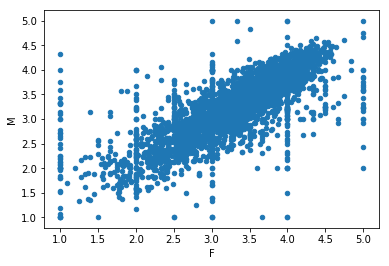

In [9]:
movie_ratings = ratings.groupby(['movieId', 'gender'])
movie_ratings.mean().unstack()['rating'].plot(kind='scatter', x='F', y='M')

In [10]:
movie_ratings.head()

,userId,movieId,rating,timestamp,title,genre,gender,age,occupation
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama,M,56,16
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama,M,25,12
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama,M,25,7
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama,M,50,1
5,18,1193,4,978156168,One Flew Over the Cuckoo's Nest (1975),Drama,F,18,3
6,19,1193,5,982730936,One Flew Over the Cuckoo's Nest (1975),Drama,M,1,10
7,24,1193,5,978136709,One Flew Over the Cuckoo's Nest (1975),Drama,F,25,7
8,28,1193,3,978125194,One Flew Over the Cuckoo's Nest (1975),Drama,F,25,1
19,59,1193,4,977934292,One Flew Over the Cuckoo's Nest (1975),Drama,F,50,1


In [11]:
movie_ratings.mean().unstack()['rating'].head()

gender,F,M
movieId,,
1,4.187817,4.130552
2,3.278409,3.175238
3,3.073529,2.994152
4,2.976471,2.482353
5,3.212963,2.888298


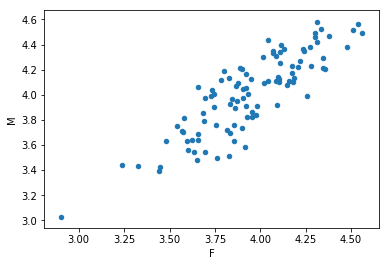

In [12]:
# 上記DataFrameと同じF,M movieIdのデータフレーム.size()でカウントとっている(ratingの数値を(axis=1で)男女を合計して,大きい順にソートしindexを保存)
indexes = movie_ratings.size().unstack().sum(axis=1).argsort()
# indexesで昇順(サイズが小さい順に上からきてるから[-100]下から100個に指定)して
top_100_movie_ratings = movie_ratings.mean()[['rating']].unstack().take(indexes)[-100:]

top_100_movie_ratings['rating'].plot(kind='scatter', x='F', y='M')

In [13]:
movie_ratings.mean().unstack()['rating'].corr()

gender,F,M
gender,,
F,1.00000,0.76319
M,0.76319,1.00000


In [14]:
top_100_movie_ratings['rating'].corr()

gender,F,M
gender,,
F,1.000000,0.857071
M,0.857071,1.000000
